In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # загружаем библиотеки

In [2]:
conn = psycopg2.connect(
    host='localhost',
    database ='postgres', 
    user='postgres', 
    password='Shol78000@' ) # Устанавливаем соединение с базой данных

In [3]:
cursor = conn.cursor() # взаимодействуем с базой данных. 

In [4]:
cursor.execute ("""SELECT od.order_id, od.product_id, od.unit_price, od.quantity,
o.ship_country,o.order_date, o.required_date, o.shipped_date, 
p.product_name
	FROM order_details od
	join orders o
	on od.order_id= o.order_id
	join products p
	on od.product_id=p.product_id""" ) # выполняем SQL-запрос

In [5]:
df = cursor.fetchall() # извлекаем все строки результата выполнения запроса 

In [6]:
df

[(10248,
  11,
  14.0,
  12,
  'France',
  datetime.date(1996, 7, 4),
  datetime.date(1996, 8, 1),
  datetime.date(1996, 7, 16),
  'Queso Cabrales'),
 (10248,
  42,
  9.8,
  10,
  'France',
  datetime.date(1996, 7, 4),
  datetime.date(1996, 8, 1),
  datetime.date(1996, 7, 16),
  'Singaporean Hokkien Fried Mee'),
 (10248,
  72,
  34.8,
  5,
  'France',
  datetime.date(1996, 7, 4),
  datetime.date(1996, 8, 1),
  datetime.date(1996, 7, 16),
  'Mozzarella di Giovanni'),
 (10249,
  14,
  18.6,
  9,
  'Germany',
  datetime.date(1996, 7, 5),
  datetime.date(1996, 8, 16),
  datetime.date(1996, 7, 10),
  'Tofu'),
 (10249,
  51,
  42.4,
  40,
  'Germany',
  datetime.date(1996, 7, 5),
  datetime.date(1996, 8, 16),
  datetime.date(1996, 7, 10),
  'Manjimup Dried Apples'),
 (10250,
  41,
  7.7,
  10,
  'Brazil',
  datetime.date(1996, 7, 8),
  datetime.date(1996, 8, 5),
  datetime.date(1996, 7, 12),
  "Jack's New England Clam Chowder"),
 (10250,
  51,
  42.4,
  35,
  'Brazil',
  datetime.date(1996, 

In [7]:
df1=pd.DataFrame(df,
    columns=[ 'order_id', 'product_id', 'unit_price', 'quantity',
'ship_country','order_date', 'required_date', 'shipped_date', 
'product_name']) # указываем порядок столбцов в новом DataFrame 

In [8]:
df1 # смотрим таблицу

,order_id,product_id,unit_price,quantity,ship_country,order_date,required_date,shipped_date,product_name
0,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales
1,10248,42,9.80,10,France,1996-07-04,1996-08-01,1996-07-16,Singaporean Hokkien Fried Mee
2,10248,72,34.80,5,France,1996-07-04,1996-08-01,1996-07-16,Mozzarella di Giovanni
3,10249,14,18.60,9,Germany,1996-07-05,1996-08-16,1996-07-10,Tofu
4,10249,51,42.40,40,Germany,1996-07-05,1996-08-16,1996-07-10,Manjimup Dried Apples
...,...,...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,USA,1998-05-06,1998-06-03,None,Wimmers gute Semmelknödel
2151,11077,66,17.00,1,USA,1998-05-06,1998-06-03,None,Louisiana Hot Spiced Okra
2152,11077,73,15.00,2,USA,1998-05-06,1998-06-03,None,Röd Kaviar
2153,11077,75,7.75,4,USA,1998-05-06,1998-06-03,None,Rhönbräu Klosterbier


In [9]:
df1.info() # shipped_date  
# shipped_date не полные данные,так как товар в пути, дата не прописана

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       2155 non-null   int64  
 1   product_id     2155 non-null   int64  
 2   unit_price     2155 non-null   float64
 3   quantity       2155 non-null   int64  
 4   ship_country   2155 non-null   object 
 5   order_date     2155 non-null   object 
 6   required_date  2155 non-null   object 
 7   shipped_date   2082 non-null   object 
 8   product_name   2155 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 151.7+ KB


In [46]:
def date_mark(row):
    if row['shipped_date'] == None:
        return 1
    else:
        return 0
# пишем функцию в которой определяем:
# если 1 - Акт_заказ (НЕТ даты доставки (ожидаем деньги) order_act_flag = 1)
# если 0 - Неакт_заказ (ЕСТЬ даты доставки (получили деньги) order_act_flag = 0)

In [47]:
df1['order_act_flag'] = df1.apply(date_mark, axis = 1) # код добавл новый столбец order_act_flag в df1 с помощью функц apply.

In [48]:
df1 # смотрим таблицу

,order_id,product_id,unit_price,quantity,ship_country,order_date,required_date,shipped_date,product_name,order_act_flag,orders_revenue
0,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,0,168.0
1,10248,42,9.80,10,France,1996-07-04,1996-08-01,1996-07-16,Singaporean Hokkien Fried Mee,0,98.0
2,10248,72,34.80,5,France,1996-07-04,1996-08-01,1996-07-16,Mozzarella di Giovanni,0,174.0
3,10249,14,18.60,9,Germany,1996-07-05,1996-08-16,1996-07-10,Tofu,0,167.4
4,10249,51,42.40,40,Germany,1996-07-05,1996-08-16,1996-07-10,Manjimup Dried Apples,0,1696.0
...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,USA,1998-05-06,1998-06-03,None,Wimmers gute Semmelknödel,1,66.5
2151,11077,66,17.00,1,USA,1998-05-06,1998-06-03,None,Louisiana Hot Spiced Okra,1,17.0
2152,11077,73,15.00,2,USA,1998-05-06,1998-06-03,None,Röd Kaviar,1,30.0
2153,11077,75,7.75,4,USA,1998-05-06,1998-06-03,None,Rhönbräu Klosterbier,1,31.0


## 1. Покажите страны, с наибольшим количеством активных заказов

In [61]:
# группируем по городам, для каждой группы вычислено суммарное значение столбца 'order_act_flag'.
act_ord_by_country = df1[df1['order_act_flag'] == 1]  
act_ord_by_country = act_ord_by_country.groupby('ship_country').agg({'order_act_flag': 'sum'}).reset_index().sort_values(by='order_act_flag', ascending=False)
act_ord_by_country.columns = ['ship_country', 'active_orders']





In [62]:
act_ord_by_country

,ship_country,active_orders
10,USA,27
11,Venezuela,8
1,Austria,7
6,Germany,7
2,Brazil,6
0,Argentina,4
5,France,4
9,Switzerland,3
3,Canada,2
7,Italy,2


## 2.Исследуя уже отправленные заказы, посчитайте количество заказов по странам.

In [63]:
act_ord_by_country=df1.groupby ('ship_country').agg({'order_act_flag':'sum'}).reset_index().sort_values(by='order_act_flag',
    ascending=False) # группируем по городам, для каждой группы вычислено суммарное значение столбца 'order_act_flag'.

act_ord_by_country.columns=['ship_country','orders']# переимен.'order_act_flag', в 'orders'.

In [64]:
act_ord_by_country

,ship_country,orders
19,USA,27
20,Venezuela,8
1,Austria,7
8,Germany,7
3,Brazil,6
7,France,4
0,Argentina,4
17,Switzerland,3
4,Canada,2
11,Mexico,2


## 3.Посчитайте среднее количество продуктов по активным заказам

In [82]:
# Фильтруем DataFrame для активных заказов (где order_act_flag = 1)
inactive_orders = df1[df1['order_act_flag'] == 1]

# Группируем по 'product_id' и вычисляем среднее количество продуктов по каждому продукту
avg = inactive_orders.groupby('product_id').agg({'quantity': 'mean'}).reset_index().sort_values(by='quantity', ascending=False)
avg.columns = ['product_id', 'avg_quantity_of_products']


In [83]:
avg

,product_id,avg_quantity_of_products
24,34,90.000000
40,64,66.000000
0,1,40.000000
28,43,36.000000
19,28,32.666667
30,49,31.000000
37,57,28.000000
32,51,24.000000
25,35,24.000000
31,50,22.000000


## 4. Выведите каждую страну, посчитайте по ней среднее количество продуктов и количество заказов. (При этом учитывайте репрезентативность результата)

In [85]:
avg_quantity = df1.groupby('ship_country').agg({'quantity':'mean'}).reset_index().sort_values(by = 'quantity',ascending = False)

order_quantity = df1.groupby('ship_country').agg({'order_id':'nunique'}).reset_index().sort_values(by = 'order_id',ascending = False)

country_avg= pd.merge(avg_quantity,order_quantity, on='ship_country',how='left')
country_avg.columns = ['ship_country', 'product_quantity','order_quantity']

country_avg.sort_values(by=['product_quantity','order_quantity'],ascending =[False,False])


,ship_country,product_quantity,order_quantity
0,Austria,41.336000,40
1,Ireland,30.618182,19
2,Germany,28.088415,122
3,USA,26.505682,122
4,Canada,26.453333,30
5,Denmark,25.434783,18
6,Venezuela,24.881356,46
7,Belgium,24.857143,19
8,Switzerland,24.519231,18
9,Sweden,23.041237,37


## 5. Исследуя уже отправленные заказы, посчитайте сумму выручки по странам

In [95]:
# Фильтруем DataFrame для неактивных заказов (где order_act_flag = 0)
not_active_orders = df1[df1['order_act_flag'] == 0]

# Вычисляем выручку для каждого заказа
not_active_orders['orders_revenue'] = not_active_orders['quantity'] * not_active_orders['unit_price']

# Группируем по 'ship_country' и вычисляем сумму выручки по каждой стране
sum_revenue_by_country = not_active_orders.groupby('ship_country')['orders_revenue'].sum().reset_index().sort_values(by='orders_revenue', ascending=False)
sum_revenue_by_country




C:\Users\shake\AppData\Local\Temp\ipykernel_7080\2561027472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_active_orders['orders_revenue'] = not_active_orders['quantity'] * not_active_orders['unit_price']


,ship_country,orders_revenue
19,USA,261482.38
8,Germany,241909.13
1,Austria,129375.13
3,Brazil,110745.68
7,France,84396.76
18,UK,60616.51
16,Sweden,59523.70
9,Ireland,57317.39
20,Venezuela,56962.33
4,Canada,54024.60


## 6. Нарисуйте круговые диаграммы по количеству заказов и странам (При этом учитывайте неактивные заказы)


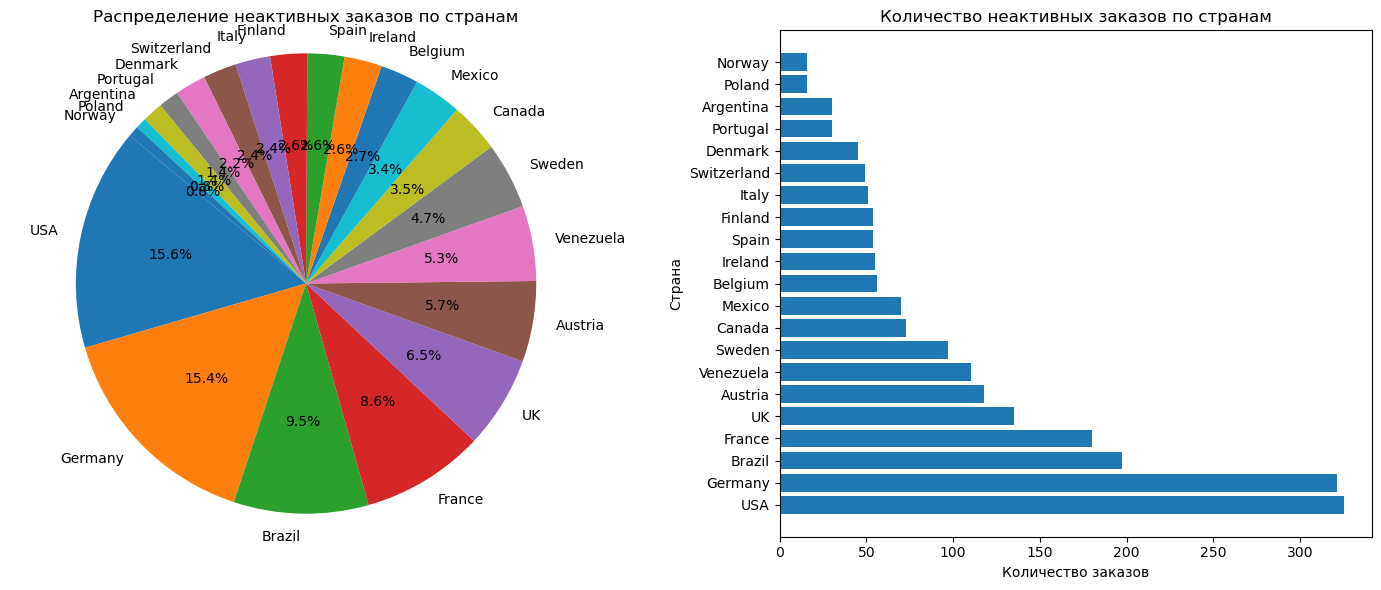

In [89]:
# Отфильтровываем данные, чтобы оставить только неактивные заказы (где order_act_flag = 0)
inactive_orders = df1[df1['order_act_flag'] == 0]

# Группируем данные по странам и подсчитываем количество неактивных заказов для каждой страны
inactive_orders_by_country = inactive_orders.groupby('ship_country').size().sort_values(ascending=False)

# Создаем subplot для круговой диаграммы
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.pie(inactive_orders_by_country, labels=inactive_orders_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение неактивных заказов по странам')
plt.axis('equal')  # Отображение круговой диаграммы в виде круга

# Создаем subplot для списка стран
plt.subplot(122)
plt.barh(inactive_orders_by_country.index, inactive_orders_by_country)
plt.title('Количество неактивных заказов по странам')
plt.xlabel('Количество заказов')
plt.ylabel('Страна')

plt.tight_layout()  # Улучшает расположение элементов на графике
plt.show()





## 7. Нарисуйте круговые диаграммы по выручке и странам. (При этом учитывайте неактивные заказы)

C:\Users\shake\AppData\Local\Temp\ipykernel_7080\4241175564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_orders['revenue'] = inactive_orders['unit_price'] * inactive_orders['quantity']


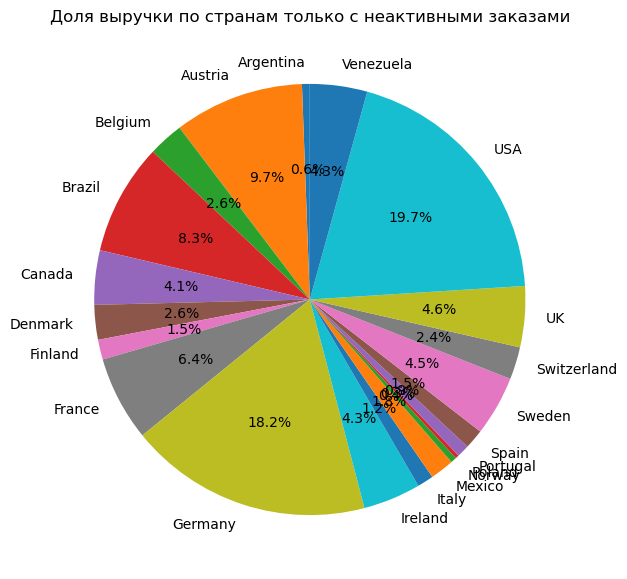

In [90]:
# Неактивные заказы
inactive_orders = df1[df1['order_act_flag'] == 0]

# Расчет общей выручки для каждого неактивного заказа
inactive_orders['revenue'] = inactive_orders['unit_price'] * inactive_orders['quantity']

# Группировка данных по странам и суммирование выручки
revenue_by_country = inactive_orders.groupby('ship_country')['revenue'].sum()

# Построение круговой диаграммы для выручки по странам с неактивными заказами
plt.figure(figsize=(10, 7))
plt.pie(revenue_by_country, labels=revenue_by_country.index, autopct='%1.1f%%', startangle=90)
plt.title('Доля выручки по странам только с неактивными заказами')
plt.show()




## 8. Нарисуйте круговые диаграммы по количеству заказов и странам (При этом учитывайте активные заказы)

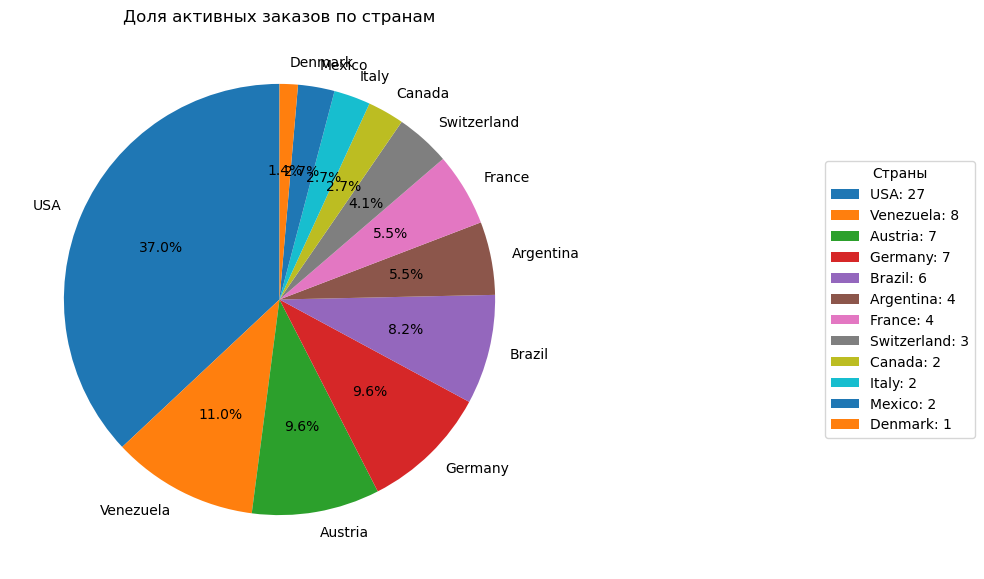

In [96]:
# Построение круговой диаграммы по количеству активных заказов и странам
act_ord_by_country = df1[df1['order_act_flag'] == 1]  
act_ord_by_country = act_ord_by_country.groupby('ship_country').size().reset_index(name='active_orders').sort_values(by='active_orders', ascending=False)

plt.figure(figsize=(10, 7))
plt.pie(act_ord_by_country['active_orders'], labels=act_ord_by_country['ship_country'], autopct='%1.1f%%', startangle=90)
plt.title('Доля активных заказов по странам')

# Создание списка для легенды
legend_labels = [f'{country}: {orders}' for country, orders in zip(act_ord_by_country['ship_country'], act_ord_by_country['active_orders'])]

# Добавление легенды сдвинутой правее
plt.legend(legend_labels, title='Страны', loc='center left', bbox_to_anchor=(1.5, 0.5))

plt.show()


## 9. Нарисуйте круговые диаграммы по выручке и странам. (При этом учитывайте активные заказы)

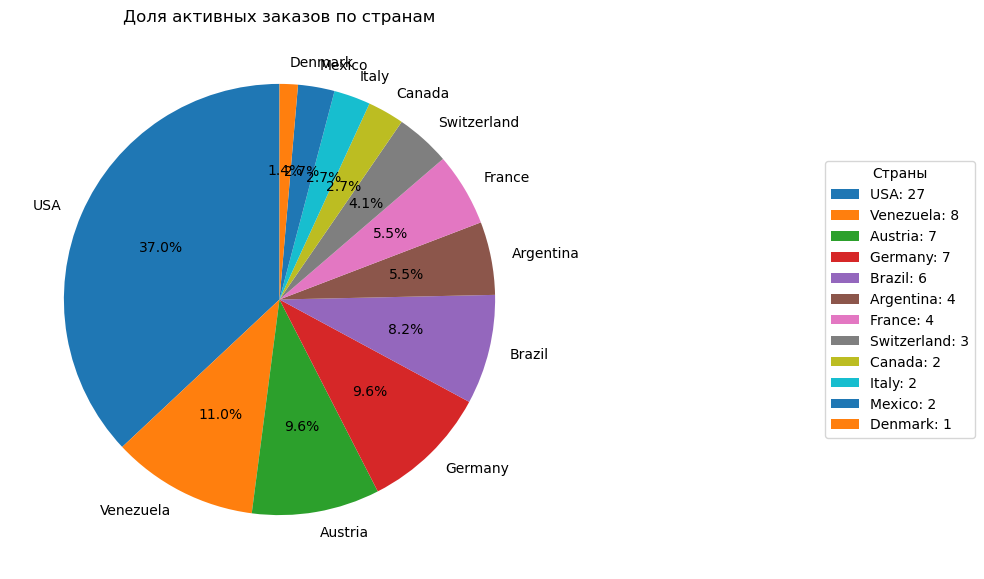

In [97]:
# Построение круговой диаграммы по количеству активных заказов и странам
act_ord_by_country = df1[df1['order_act_flag'] == 1]  
act_ord_by_country = act_ord_by_country.groupby('ship_country').size().reset_index(name='active_orders').sort_values(by='active_orders', ascending=False)

plt.figure(figsize=(10, 7))
plt.pie(act_ord_by_country['active_orders'], labels=act_ord_by_country['ship_country'], autopct='%1.1f%%', startangle=90)
plt.title('Доля активных заказов по странам')

# Создание списка для легенды
legend_labels = [f'{country}: {orders}' for country, orders in zip(act_ord_by_country['ship_country'], act_ord_by_country['active_orders'])]

# Добавление легенды сдвинутой правее
plt.legend(legend_labels, title='Страны', loc='center left', bbox_to_anchor=(1.5, 0.5))

plt.show()


## 10. Сделайте выводы и предложите в какой стране более выгодно оперировать.

## Из анализа данных о доставке продуктов по всему миру следует, что отправка товаров в США и Германию наиболее выгодна. Эти две страны являются лидерами как по количеству заказов, так и по общей выручке. Однако стоит отметить, что страны с низкими показателями заказов и выручки, такие как Норвегия и Польша, могут не быть оптимальными для стратегии работы.
## Вместо того чтобы тратить ресурсы на страны с низкими показателями заказов и выручки, эти ресурсы могут быть лучше использованы для улучшения работы с клиентами из более прибыльных стран, таких как США и Германия. Такой подход позволит достичь более значимых результатов и оптимизировать использование доступных ресурсов.